In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
tab2d = pd.read_excel('GP_APPT_Publication_April_2021.xlsx', sheet_name= 'Table 2d', header= 12, nrows= 30,
                usecols= ['__', 'Appointment_Date', 'Total', 'Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 
                          'More than 28 Days', 'Unknown / Data Issue'])

tab2d.rename(columns = {'__': 'Day', 'Total': 'Total_Appointments', 'Same Day': 'Same_Day', '1 Day': '1_Day', '2 to 7 Days': '2_to_7_Days', '8  to 14 Days': '8_to_14_Days', '15  to 21 Days': '15_to_21_Days', '22  to 28 Days': '22_to_28_Days', 'More than 28 Days': 'More_than_28_Days'}, inplace=True)

tab2d.head()

,Day,Appointment_Date,Total_Appointments,Same_Day,1_Day,2_to_7_Days,8_to_14_Days,15_to_21_Days,22_to_28_Days,More_than_28_Days,Unknown / Data Issue
0,Thu,2021-04-01,1141269,516488,124055,246385,138006,55640,32202,28173,320
1,Fri,2021-04-02,15534,2050,1326,6119,3056,540,402,1982,59
2,Sat,2021-04-03,20654,3385,444,10539,3714,1051,496,1018,7
3,Sun,2021-04-04,3418,1061,219,1198,247,152,142,387,12
4,Mon,2021-04-05,4897,1509,82,1374,322,252,355,846,157


In [3]:
tab2d.tail()

,Day,Appointment_Date,Total_Appointments,Same_Day,1_Day,2_to_7_Days,8_to_14_Days,15_to_21_Days,22_to_28_Days,More_than_28_Days,Unknown / Data Issue
25,Mon,2021-04-26,1342346,693635,8598,378460,146215,51001,32088,31762,587
26,Tue,2021-04-27,1253917,546589,172790,254431,152229,67042,26259,33961,616
27,Wed,2021-04-28,1171524,498454,139063,258593,149437,65127,26337,33978,535
28,Thu,2021-04-29,1179655,499337,131382,267875,150930,65272,27919,36337,603
29,Fri,2021-04-30,1157348,520077,126050,258838,141741,59874,17540,32983,245


In [4]:
tab2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Day                   30 non-null     object        
 1   Appointment_Date      30 non-null     datetime64[ns]
 2   Total_Appointments    30 non-null     int64         
 3   Same_Day              30 non-null     int64         
 4   1_Day                 30 non-null     int64         
 5   2_to_7_Days           30 non-null     int64         
 6   8_to_14_Days          30 non-null     int64         
 7   15_to_21_Days         30 non-null     int64         
 8   22_to_28_Days         30 non-null     int64         
 9   More_than_28_Days     30 non-null     int64         
 10  Unknown / Data Issue  30 non-null     int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 2.7+ KB


In [5]:
tab2d.describe()

,Total_Appointments,Same_Day,1_Day,2_to_7_Days,8_to_14_Days,15_to_21_Days,22_to_28_Days,More_than_28_Days,Unknown / Data Issue
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,7.934171e+05,360384.800000,76218.833333,171474.933333,96889.566667,43214.866667,23343.466667,21521.433333,369.166667
std,5.558830e+05,263735.279561,69963.977187,124857.633477,69581.558751,31975.867657,17173.843885,13932.095081,274.598652
min,3.418000e+03,1061.000000,82.000000,1198.000000,247.000000,151.000000,84.000000,387.000000,1.000000
25%,5.541650e+04,4422.250000,5256.750000,23154.500000,10491.250000,3013.500000,1014.500000,4238.000000,85.000000
50%,1.135372e+06,497247.500000,119231.500000,244749.000000,130264.000000,53320.500000,32145.000000,28647.000000,382.500000
75%,1.173124e+06,517427.750000,132213.000000,256113.000000,151904.250000,71825.250000,37944.250000,31722.500000,585.500000
max,1.342346e+06,693635.000000,172790.000000,378460.000000,179527.000000,81312.000000,42479.000000,36337.000000,865.000000


In [6]:
t2dm = tab2d.mean()

<ipython-input-6-d9cc5269aef2>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  t2dm = tab2d.mean()


Text(0.5, 1.0, 'Average Appointment Wait April 2021')

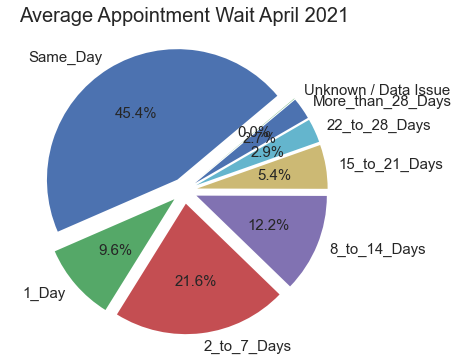

In [7]:
t2dm[1:9].plot.pie(figsize= [10,6], fontsize= 15, explode= [0.1]*8, autopct= '%1.1f%%', startangle= 40, ylabel= ' ').set_title('Average Appointment Wait April 2021', fontsize= 20)

In [8]:
def percentsplit(columns):
    pct1 = round((columns[1]/columns[0])*100, 2)
    pct2 = round((columns[2]/columns[0])*100, 2)
    pct3 = round((columns[3]/columns[0])*100, 2)
    pct4 = round((columns[4]/columns[0])*100, 2)
    pct5 = round((columns[5]/columns[0])*100, 2)
    pct6 = round((columns[6]/columns[0])*100, 2)
    pct7 = round((columns[7]/columns[0])*100, 2)
    pct8 = round((columns[8]/columns[0])*100, 2)
    return pct1, pct2, pct3, pct4, pct5, pct6, pct7, pct8

In [9]:
t2dpct = tab2d[['Total_Appointments', 'Same_Day', '1_Day', '2_to_7_Days', '8_to_14_Days', '15_to_21_Days', '22_to_28_Days', 'More_than_28_Days', 'Unknown / Data Issue']].apply(percentsplit, axis= 1)

In [10]:
t2dp = pd.DataFrame(t2dpct.apply(pd.Series))
t2dp.columns= ['Percent_Same_Day', 'Percent_1_Day', 'Percent_2_to_7_Days', 'Percent_8_to_14_Days', 'Percent_15_to_21_Days', 'Percent_22_to_28_Days', 'Percent_More_than_28_Days', 'Percent_Unknown']

In [11]:
t2dp.head()

,Percent_Same_Day,Percent_1_Day,Percent_2_to_7_Days,Percent_8_to_14_Days,Percent_15_to_21_Days,Percent_22_to_28_Days,Percent_More_than_28_Days,Percent_Unknown
0,45.26,10.87,21.59,12.09,4.88,2.82,2.47,0.03
1,13.20,8.54,39.39,19.67,3.48,2.59,12.76,0.38
2,16.39,2.15,51.03,17.98,5.09,2.40,4.93,0.03
3,31.04,6.41,35.05,7.23,4.45,4.15,11.32,0.35
4,30.81,1.67,28.06,6.58,5.15,7.25,17.28,3.21


In [12]:
t2dp = t2dp.join(tab2d['Appointment_Date'], on= t2dp.index)

In [13]:
t2dp = t2dp[['Appointment_Date', 'Percent_Same_Day', 'Percent_1_Day', 'Percent_2_to_7_Days', 'Percent_8_to_14_Days', 'Percent_15_to_21_Days', 'Percent_22_to_28_Days', 'Percent_More_than_28_Days', 'Percent_Unknown']]
t2dp.head()

,Appointment_Date,Percent_Same_Day,Percent_1_Day,Percent_2_to_7_Days,Percent_8_to_14_Days,Percent_15_to_21_Days,Percent_22_to_28_Days,Percent_More_than_28_Days,Percent_Unknown
0,2021-04-01,45.26,10.87,21.59,12.09,4.88,2.82,2.47,0.03
1,2021-04-02,13.20,8.54,39.39,19.67,3.48,2.59,12.76,0.38
2,2021-04-03,16.39,2.15,51.03,17.98,5.09,2.40,4.93,0.03
3,2021-04-04,31.04,6.41,35.05,7.23,4.45,4.15,11.32,0.35
4,2021-04-05,30.81,1.67,28.06,6.58,5.15,7.25,17.28,3.21


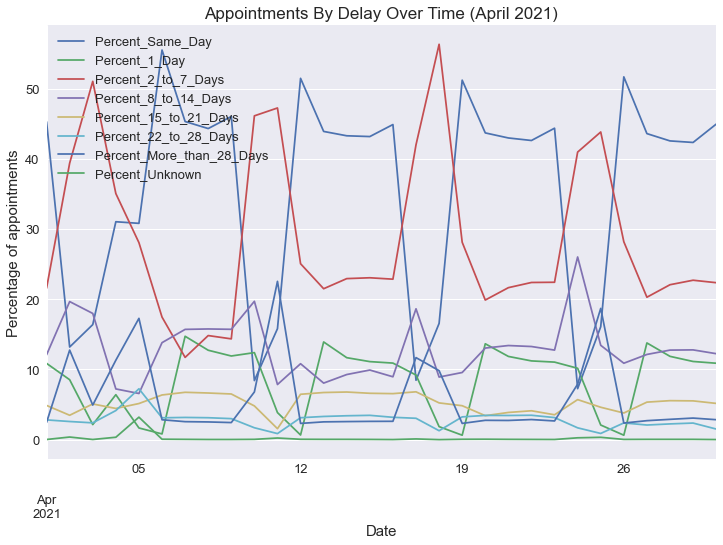

In [14]:
plt = t2dp.plot(kind='line',x= 'Appointment_Date', y= ['Percent_Same_Day', 'Percent_1_Day', 'Percent_2_to_7_Days', 'Percent_8_to_14_Days', 'Percent_15_to_21_Days', 'Percent_22_to_28_Days', 'Percent_More_than_28_Days', 'Percent_Unknown'], 
figsize= [12,8], fontsize= 13, grid= True)

plt.set_title('Appointments By Delay Over Time (April 2021)', fontsize= 17)
plt.set_ylabel('Percentage of appointments', fontsize= 15)
plt.set_xlabel('Date', fontsize= 15)
plt.legend(fontsize= 13)

<ipython-input-15-3ecd786ceabe>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fig = tab2d.groupby(['Day'])['Same_Day', '1_Day', '2_to_7_Days', '8_to_14_Days', '15_to_21_Days', '22_to_28_Days', 'More_than_28_Days', 'Unknown / Data Issue'].sum().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri' ,'Sat' ,'Sun']).plot(kind='bar', figsize= (12,8), fontsize= 13)


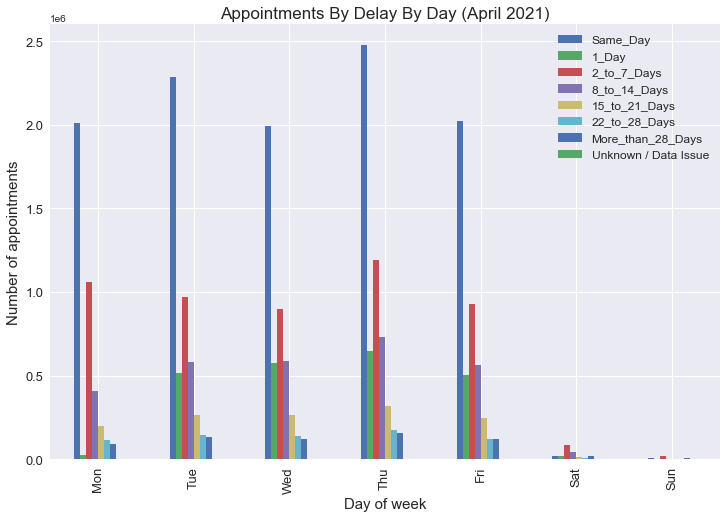

In [15]:
fig = tab2d.groupby(['Day'])['Same_Day', '1_Day', '2_to_7_Days', '8_to_14_Days', '15_to_21_Days', '22_to_28_Days', 'More_than_28_Days', 'Unknown / Data Issue'].sum().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri' ,'Sat' ,'Sun']).plot(kind='bar', figsize= (12,8), fontsize= 13)

fig.set_title('Appointments By Delay By Day (April 2021)', fontsize= 17)
fig.set_xlabel('Day of week', fontsize= 15)
fig.set_ylabel('Number of appointments', fontsize= 15)
fig.legend(loc= 'upper right', fontsize= 12)